In [46]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
from imutils.perspective import four_point_transform

%matplotlib inline

In [40]:
# load the example image
image = cv2.imread("mining-optimizer/data/HQ_digital/e1d0c7cffa534df014e9a2970b1b29171f8a8a90.jpg")
# image = cv2.imread("mining-optimizer/data/HQ_digital/05f3d4b586d92ba18b00dedd6dbe4a163f9ea1c1.jpg")

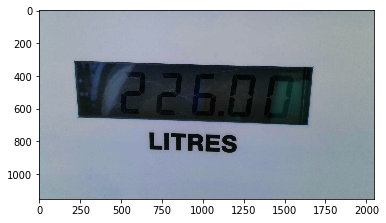

In [47]:
plt.imshow(image)

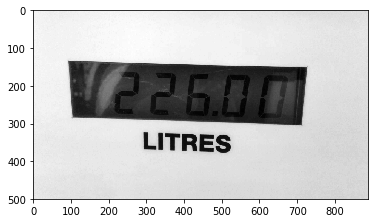

In [42]:
plt.imshow(gray, cmap=plt.cm.gray)

In [30]:
# pre-process the image by resizing it, converting it to
# graycale, blurring it, and computing an edge map
image = imutils.resize(image, height=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 200, 255)

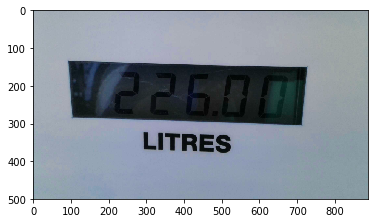

In [31]:
plt.imshow(image)

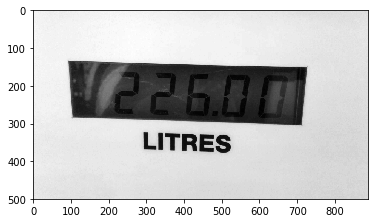

In [32]:
plt.imshow(gray, cmap=plt.cm.gray)

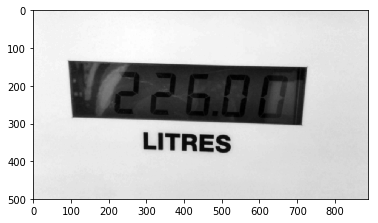

In [33]:
plt.imshow(blurred, cmap=plt.cm.gray)

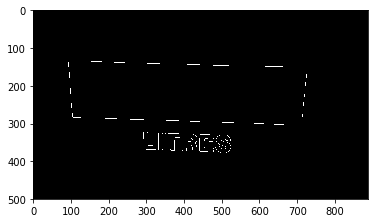

In [34]:
plt.imshow(edged, cmap=plt.cm.gray)

In [35]:
# find contours in the edge map, then sort them by their
# size in descending order
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None

In [36]:
# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # if the contour has four vertices, then we have found
    # the thermostat display
    if len(approx) == 4:
        displayCnt = approx
        break

In [37]:
# extract the thermostat display, apply a perspective transform
# to it
warped = four_point_transform(gray, displayCnt.reshape(4, 2))
output = four_point_transform(image, displayCnt.reshape(4, 2))

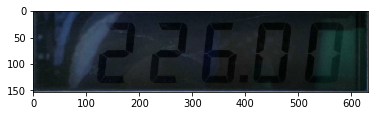

In [38]:
plt.imshow(warped)
plt.imshow(output)

True

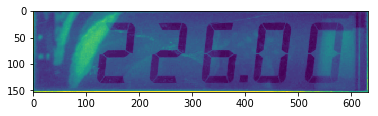

In [45]:
new_image = cv2.convertScaleAbs(warped, alpha=2, beta=0)
plt.imshow(new_image)
cv2.imwrite('test_contrast.jpg', new_image)

In [142]:
# threshold the warped image, then apply a series of morphological
# operations to cleanup the thresholded image
thresh = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)